# DATA PM2.5

In [3]:
#import important libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [4]:
#import data
data = pd.read_csv('raw_air_pollution_data_2023.csv')
data.head()

,date,um100,um025,pm1,pm25,um010,pm10,um003,temperature,um050,um005,pressure,humidity,locationId,location,latitude,longitude,country
0,2023-01-01T15:00:00+07:00,0.001667,0.113333,25.833333,36.333333,2.445000,42.400000,NaN,NaN,NaN,NaN,NaN,NaN,354662,Regatta The Icon,-6.09474,106.79309,ID
1,2023-01-01T16:00:00+07:00,0.000000,0.046667,16.766667,21.800000,1.228333,23.050000,NaN,NaN,NaN,NaN,NaN,NaN,354662,Regatta The Icon,-6.09474,106.79309,ID
2,2023-01-01T17:00:00+07:00,0.000000,0.042414,19.251724,24.296552,1.229310,25.196552,NaN,NaN,NaN,NaN,NaN,NaN,354662,Regatta The Icon,-6.09474,106.79309,ID
3,2023-01-01T18:00:00+07:00,0.000000,0.047000,20.863333,26.783333,1.361667,27.993333,NaN,NaN,NaN,NaN,NaN,NaN,354662,Regatta The Icon,-6.09474,106.79309,ID
4,2023-01-01T19:00:00+07:00,0.000667,0.094333,24.936667,33.813333,1.889667,38.106667,NaN,NaN,NaN,NaN,NaN,NaN,354662,Regatta The Icon,-6.09474,106.79309,ID


# Preprocessing and Cleaning

In [5]:
#remove duplicates and unwanted observations
data = data.drop_duplicates(ignore_index=True)

In [6]:
data = data.drop(['um100', 'um025', 'pm1', 'um010', 'pm10', 'um003', 'temperature', 'um050', 'um005', 'pressure', 'humidity', 'locationId', 'latitude', 'longitude', 'country'], axis = 1)

In [7]:
data.head()

,date,pm25,location
0,2023-01-01T15:00:00+07:00,36.333333,Regatta The Icon
1,2023-01-01T16:00:00+07:00,21.800000,Regatta The Icon
2,2023-01-01T17:00:00+07:00,24.296552,Regatta The Icon
3,2023-01-01T18:00:00+07:00,26.783333,Regatta The Icon
4,2023-01-01T19:00:00+07:00,33.813333,Regatta The Icon


In [8]:
#handling missing data
data.isnull()

,date,pm25,location
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
14357,False,False,False
14358,False,False,False
14359,False,False,False
14360,False,False,False


In [9]:
data_new = data.dropna(axis=0, how="any", subset=None, inplace=True)
data_new.tail()

AttributeError: 'NoneType' object has no attribute 'tail'

In [ ]:
#changing data type
data_new.info() ##tipe data sudah sesuai sehingga tidak perlu diubah

In [ ]:
#define a function called "outliers" which returns a list of index of outliers
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3-Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    
    return ls

In [ ]:
#create an empty list to store the output indices from multiple columns

index_list = []
for feature in ['pm25']:
    index_list.extend(outliers(data_new, feature))

In [10]:
index_list

NameError: name 'index_list' is not defined

In [11]:
#define a function called "remove" which returns a cleaned dataframe without outliers

def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [12]:
data_new_cleaned = remove(data_new, index_list)

NameError: name 'index_list' is not defined

In [13]:
data_new_cleaned.info() #jumlah data telah berkurang (7696 menjadi 6877)

NameError: name 'data_new_cleaned' is not defined

In [14]:
#export data yang telah dicleaning untuk menambah kolom baru yang akan diisi dengan jumlah partikel pm2.5 per bulan (januari-agustus)
os.getcwd()

'C:\\Users\\USER\\Graduation Night'

In [15]:
data.to_csv('cleaned_data_pm25.csv', index=False)

In [16]:
#import new data
data_pm25 = pd.read_csv('cleaned_data_pm25_fix.csv')
data_pm25.head()

,date,pm25,location,bulan,total
0,2023-01-01T15:00:00+07:00,36.333333,Regatta The Icon,januari,56983.440360
1,2023-01-01T15:00:00+07:00,34.086207,Ancol,februari,6052.205157
2,2023-01-01T15:00:00+07:00,30.376667,Angkasa-Kemayoran,maret,32134.051780
3,2023-01-01T15:00:00+07:00,34.173333,LTC Glodok,april,51873.236980
4,2023-01-01T16:00:00+07:00,21.800000,Regatta The Icon,mei,29643.304600


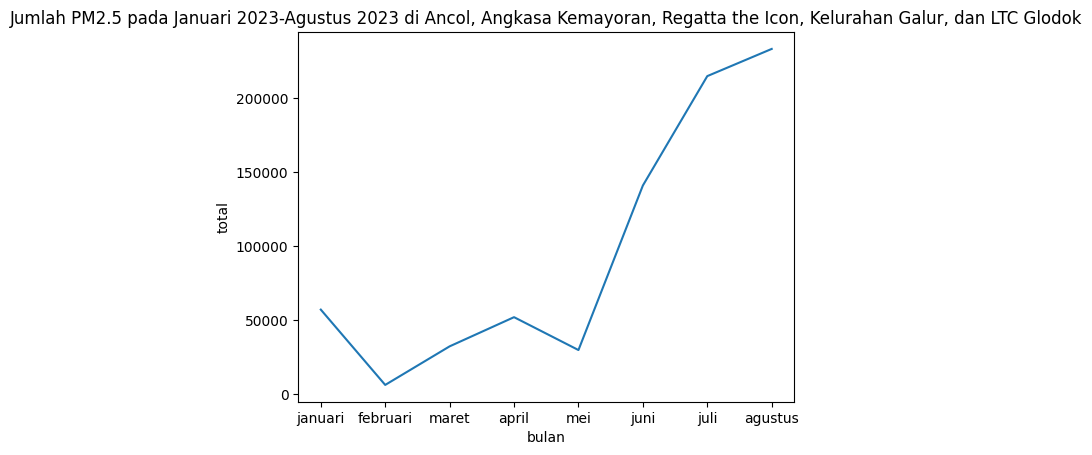

In [17]:
sns.lineplot(x='bulan',y='total',data=data_pm25)
plt.title('Jumlah PM2.5 pada Januari 2023-Agustus 2023 di Ancol, Angkasa Kemayoran, Regatta the Icon, Kelurahan Galur, dan LTC Glodok')
plt.show()

# Data Perbandingan Jumlah Kendaraan DKI JAKARTA

In [18]:
#import data
data_kendaraan = pd.read_csv('Jumlah Kendaraan Bermotor Menurut Jenis Kendaraan (unit) di Provinsi DKI Jakarta 2020-2022 - Sheet1.csv')
data_kendaraan.head()

,Jenis Kendaraan,Jumlah
0,Mobil penumpang,1.067602e+07
1,Sepeda motor,5.015746e+07
2,Bus,1.087850e+02
3,Truk,2.141162e+06


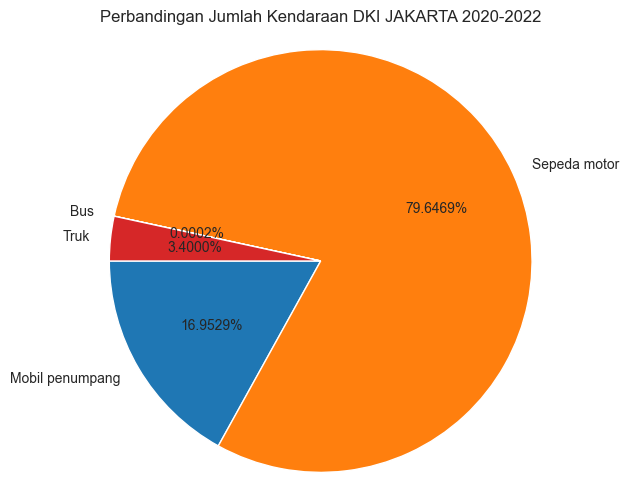

In [19]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(data_kendaraan['Jumlah'], labels=data_kendaraan['Jenis Kendaraan'], autopct='%1.4f%%', startangle=180)
plt.title('Perbandingan Jumlah Kendaraan DKI JAKARTA 2020-2022')
plt.axis('equal')
plt.show()

# perlakuan rumah tangga terhadap sampah  

In [20]:
#import file
data_sampah = pd.read_csv('perlakuan rumah tangga terhadap sampah (2017).csv')
data_sampah.head()

,Jenis Perlakuan,Persentase
0,Dibakar,66.8
1,Didaur ulang,1.2
2,Lainnya,32.0


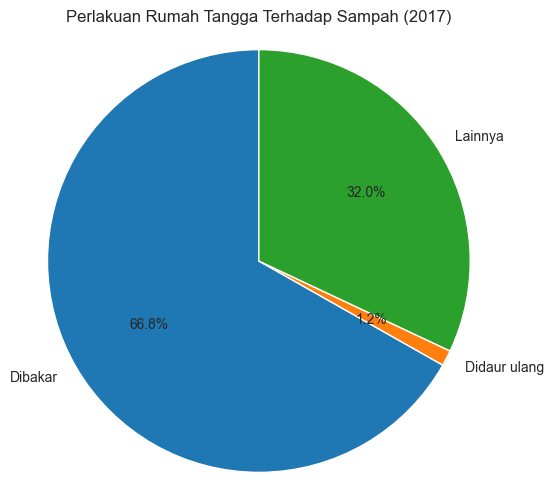

In [21]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(data_sampah['Persentase'], labels=data_sampah['Jenis Perlakuan'], autopct='%1.1f%%', startangle=90)
plt.title('Perlakuan Rumah Tangga Terhadap Sampah (2017)')
plt.axis('equal')
plt.show()

# Kebakaran hutan di Indonesia

In [22]:
#import file
data_kebakaran_hutan = pd.read_csv('kebakaran hutan (2019-2022).csv')
data_kebakaran_hutan.head()

,Tahun,Luas (kha)
0,2019,92.1
1,2020,80.0
2,2021,28.7
3,2022,27.7


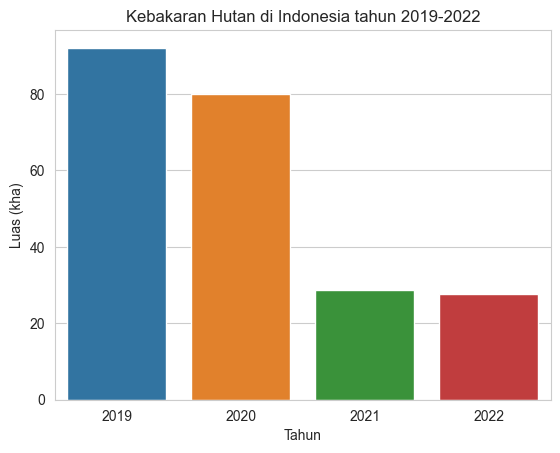

In [23]:
sns.barplot(x='Tahun',y='Luas (kha)',data=data_kebakaran_hutan)
plt.title('Kebakaran Hutan di Indonesia tahun 2019-2022')
plt.show()

#    Penyumbang Polusi

## Pendapat warga

In [24]:
#import data
data_polutan = pd.read_csv('Sumber Pencemaran Udara di Indonesia menurut Masyarakat (Agusus 2023) - Sheet1.csv')
data_polutan.head(9)

,Nama,Persentase
0,Emisi transportasi,82.2
1,Pembakaran sampah,72.3
2,Asap rokok,57.0
3,Kebakaran hutan,54.5
4,PLTU batu bara,39.8
5,Konstruksi bangunan,36.3
6,Emisi rumah tangga,31.4
7,Lainnya,3.9
8,Tidak tahu,0.2


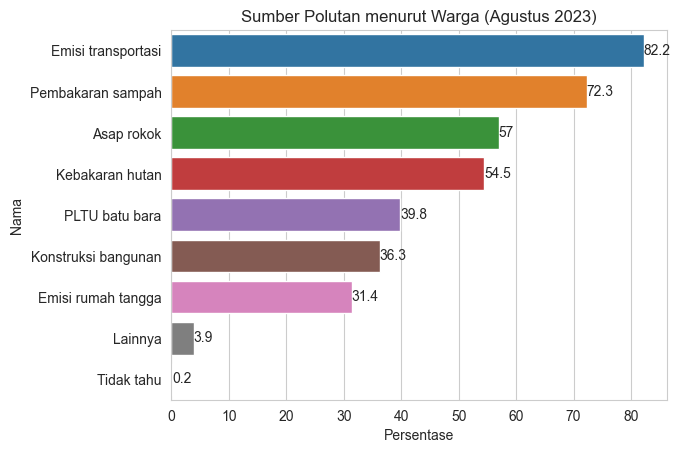

In [25]:
#graphing
ax = sns.barplot(x='Persentase',y='Nama',data=data_polutan)
plt.title('Sumber Polutan menurut Warga (Agustus 2023)')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

## Data KLHK

In [26]:
#import data
data_polutan2 = pd.read_csv('sumber emisi per sektor (sc_ KLHK) - Sheet1.csv')
data_polutan2.head()

,Sektor,Persentase
0,Transportasi,44
1,Industri energi,31
2,Manufaktur,10
3,Perumahan,14
4,Komersial,1


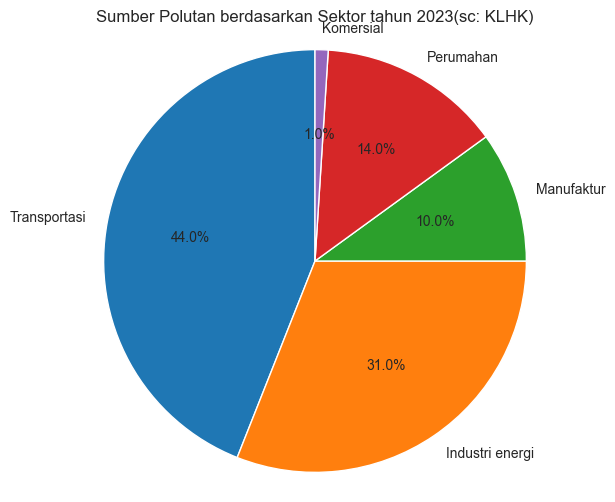

In [27]:
#graphing
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(data_polutan2['Persentase'], labels=data_polutan2['Sektor'], autopct='%1.1f%%', startangle=90)
plt.title('Sumber Polutan berdasarkan Sektor tahun 2023(sc: KLHK)')
plt.axis('equal')
plt.show()

# Faktor Kurangnya Kesadaran Lingkungan

## Pengetahuan bahwa masalah lingkungan dapat mengancam kesehatan

In [28]:
#import data
data_kesehatan = pd.read_csv('Masalah lingkungan dapat mengancam kesehatan - Sheet1.csv')
data_kesehatan.head()

,Negara,Persentase setuju,Persentase tidak setuju,Persentase tidak tahu
0,Australia,80,16,4
1,Brazil,85,11,4
2,Kanada,82,13,5
3,Cina,93,7,0
4,Jerman,83,14,3


In [29]:
#data preprocessing
data_kesehatan_melt = pd.melt(data_kesehatan, id_vars=['Negara'])

data_kesehatan_melt_pivot = data_kesehatan_melt.pivot(index='Negara', columns='variable', values='value')
data_kesehatan_melt_pivot

variable,Persentase setuju,Persentase tidak setuju,Persentase tidak tahu
Negara,,,
Afrika Selatan,90,9,1
Amerika Serikat,79,17,4
Australia,80,16,4
Brazil,85,11,4
Cina,93,7,0
India,88,11,1
Inggris,85,10,5
Italia,88,11,1
Jepang,80,11,9


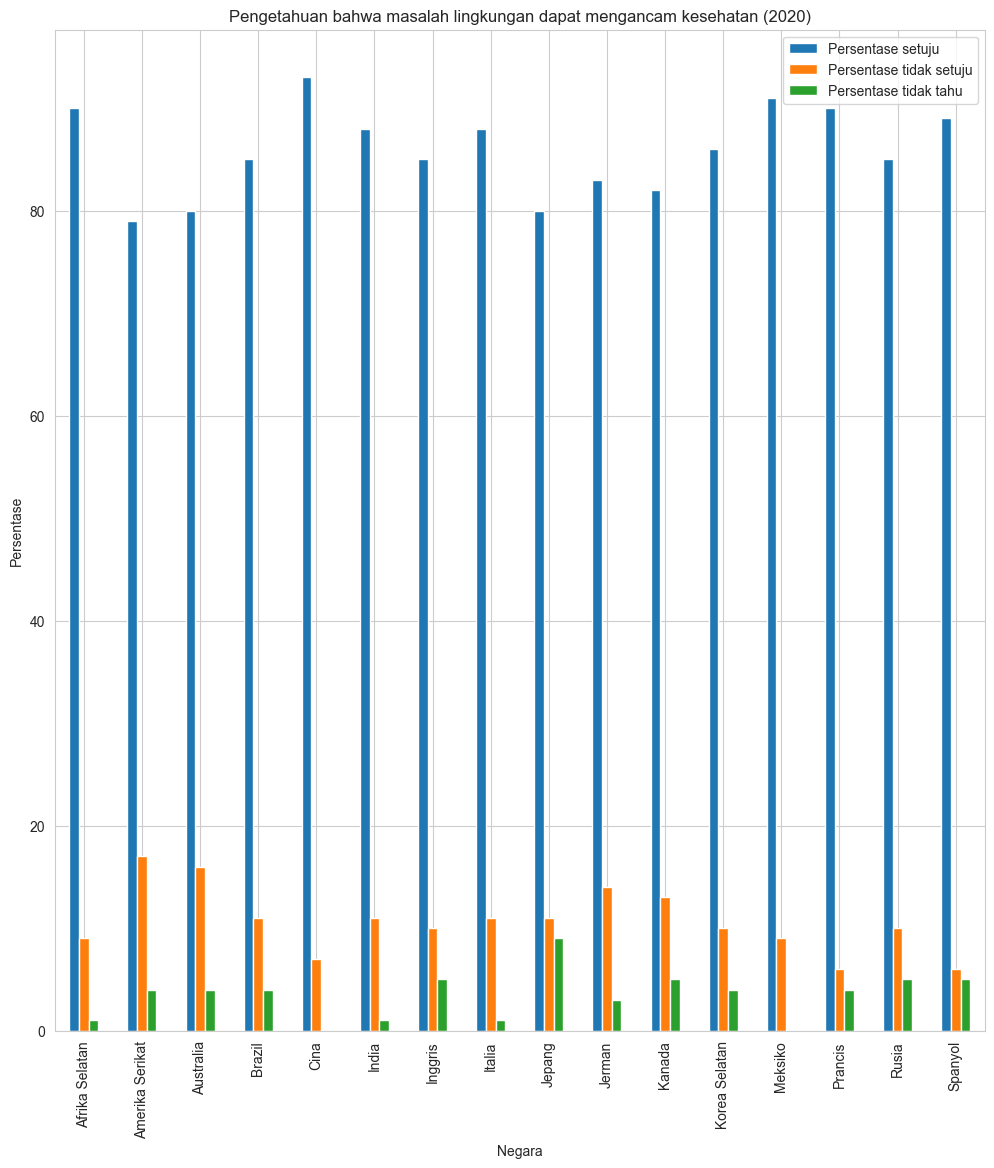

In [30]:
#graphing
data_kesehatan_melt_pivot.plot(kind='bar', figsize=(12,13))
plt.xlabel('Negara')
plt.ylabel('Persentase')
plt.title('Pengetahuan bahwa masalah lingkungan dapat mengancam kesehatan (2020)')
plt.legend(loc='upper right')
plt.show()

## Pendapat apakah menjaga lingkungan bukan prioritas untuk saat ini 

In [31]:
#import data
data_prioritas = pd.read_csv('Apakah menjaga lingkungan bukan prioritas untuk sekarang_ - Sheet1.csv')
data_prioritas.head()

,Negara,Persentase setuju,Persentase tidak setuju,Persentase tidak tahu
0,Australia,46,50,4
1,Brazil,41,52,7
2,Kanada,40,55,5
3,Cina,40,58,2
4,Jerman,27,63,10


In [32]:
#data preprocessing
data_prioritas_melt = pd.melt(data_prioritas, id_vars=['Negara'])

data_prioritas_melt_pivot = data_prioritas_melt.pivot(index='Negara', columns='variable', values='value')
data_prioritas_melt_pivot

variable,Persentase setuju,Persentase tidak setuju,Persentase tidak tahu
Negara,,,
Afrika Selatan,36,60,4
Amerika Serikat,46,45,9
Australia,46,50,4
Brazil,41,52,7
Cina,40,58,2
India,67,30,3
Inggris,41,55,4
Italia,65,30,5
Jepang,46,42,12


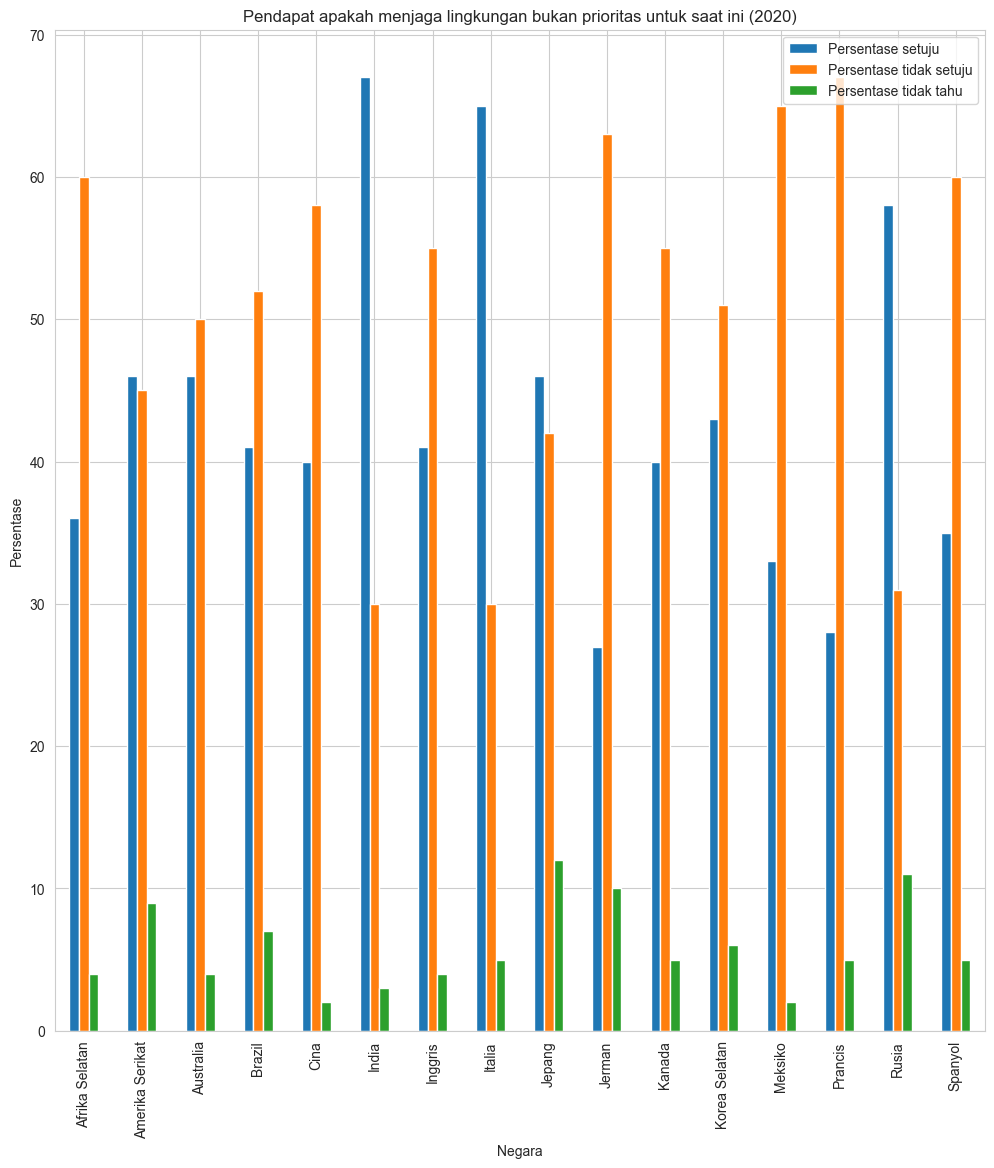

In [33]:
#graphing
data_prioritas_melt_pivot.plot(kind='bar', figsize=(12,13))
plt.xlabel('Negara')
plt.ylabel('Persentase')
plt.title('Pendapat apakah menjaga lingkungan bukan prioritas untuk saat ini (2020)')
plt.legend(loc='upper right')
plt.show()

## Perasaan Tanggung Jawab Menjamin Generasi Muda untuk Tidak Merusak Lingkungan

In [34]:
#import data
data_tanggungjawab = pd.read_csv('Perasaan Tanggung Jawab untuk Menjamin Generasi Muda yang Tidak Merusak Lingkungan - Sheet1.csv')
data_tanggungjawab.head()

,Negara,Persentase setuju,Persentase tidak setuju,Persentase tidak tahu
0,Australia,81,17,2
1,Brazil,82,16,2
2,Kanada,81,17,2
3,Cina,92,7,1
4,Jerman,81,16,3


In [35]:
#data preprocessing
data_tanggungjawab_melt = pd.melt(data_tanggungjawab, id_vars=['Negara'])

data_tanggungjawab_melt_pivot = data_tanggungjawab_melt.pivot(index='Negara', columns='variable', values='value')
data_tanggungjawab_melt_pivot

variable,Persentase setuju,Persentase tidak setuju,Persentase tidak tahu
Negara,,,
Afrika Selatan,91,8,1
Amerika Serikat,80,17,3
Australia,81,17,2
Brazil,82,16,2
Cina,92,7,1
India,84,13,3
Inggris,81,15,4
Italia,84,14,2
Jepang,82,15,3


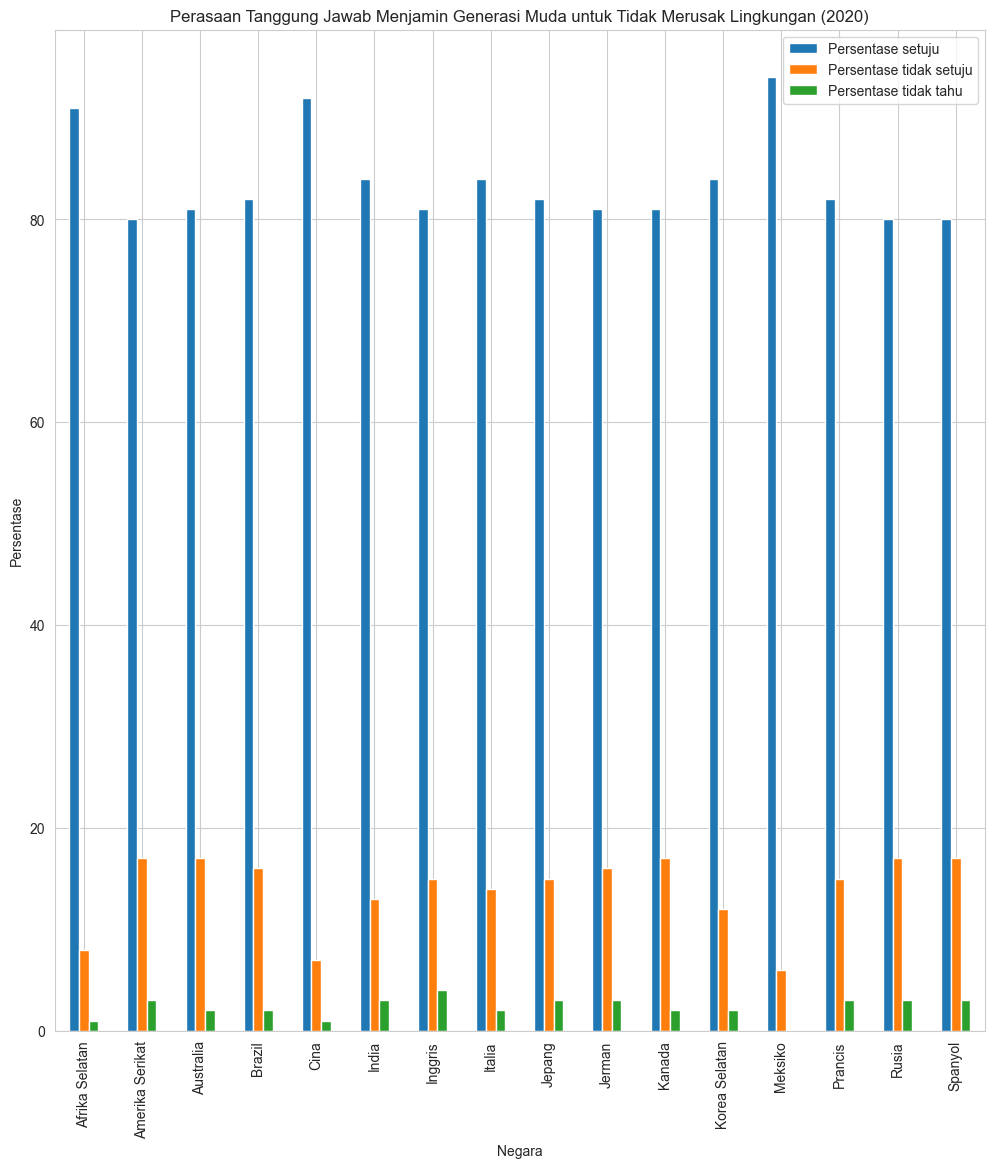

In [36]:
#graphing
data_tanggungjawab_melt_pivot.plot(kind='bar', figsize=(12,13))
plt.xlabel('Negara')
plt.ylabel('Persentase')
plt.title('Perasaan Tanggung Jawab Menjamin Generasi Muda untuk Tidak Merusak Lingkungan (2020)')
plt.legend(loc='upper right')
plt.show()

# Data Kesadaran Masyarakat Terhadap Kondisi Lingkungan

In [37]:
data1 = pd.read_excel('C:/Daniel/DSA/climate_change_opinion_survey_2022_aggregated.xlsx',sheet_name='climate_awareness')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Daniel/DSA/climate_change_opinion_survey_2022_aggregated.xlsx'

In [38]:
data3 = data1['climate_awareness']
data2 = data1['Indonesia']

NameError: name 'data1' is not defined

In [39]:
data3 = data3[:5]
data2 = data2[:5]
plt.pie(data2, labels=data3, shadow=True, startangle=90, autopct='%1.1f%%')
plt.title('Indonesian Knowledge About Climate Change')
plt.figure(figsize=(6,6))
plt.show()

NameError: name 'data3' is not defined

In [40]:
data11 = pd.read_excel('C:/Daniel/DSA/climate_change_opinion_survey_2022_aggregated.xlsx',sheet_name='climate_beliefs')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Daniel/DSA/climate_change_opinion_survey_2022_aggregated.xlsx'

In [7]:
data22 = data11['Indonesia']
data33 = data11['climate_beliefs']

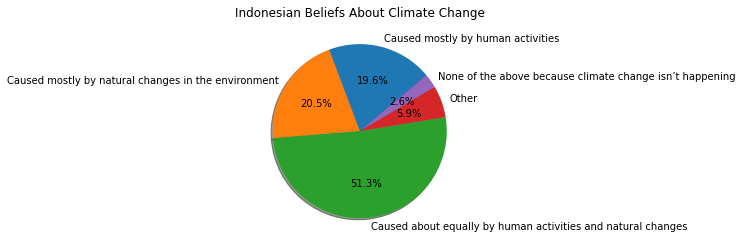

<Figure size 432x432 with 0 Axes>

In [16]:
plt.pie(data22[:5], labels=data33[:5], shadow=True, startangle=40
        , autopct='%1.1f%%')
plt.title('Indonesian Beliefs About Climate Change')
plt.figure(figsize=(6,6))
plt.show()

In [17]:
data111 = pd.read_excel('C:/Daniel/DSA/climate_change_opinion_survey_2022_aggregated.xlsx',sheet_name='harm_personally')

In [18]:
data222 = data111['Indonesia']
data333 = data111['harm_personally']

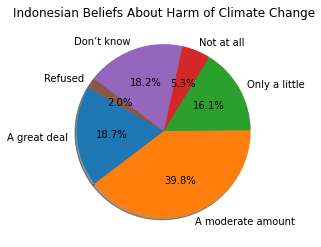

<Figure size 432x432 with 0 Axes>

In [19]:
plt.pie(data222[:6], labels=data333[:6], shadow=True, startangle=150, autopct='%1.1f%%')
plt.title('Indonesian Beliefs About Harm of Climate Change')
plt.figure(figsize=(6,6))
plt.show()